In [1]:
# エポック（epoch）とは、学習を繰り返す回数に関する単位である。学習において、訓練データをすべて使い切ったときの回数にあたる。例えば10000枚の訓練データに対して100個のミニバッチ学習をする際、確率勾配降下法を100回繰り返すと、すべての訓練データを使ったことになる。この時「1 epoch = 100回」となる。

import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

# #============ 今回だけの特別仕様（数値微分による確率勾配降下法のみ）
# # 誤差逆伝播法を用いていないため、時間がかかる。そのため、ここでは60000枚のデータではなく、100枚だけ用いることにする。
# x_train, t_train = x_train[:100], t_train[:100]

train_size = x_train.shape[0]

train_loss_list = []    # 各更新における損失関数の値を保存するためのリストを用意

# ハイパーパラメータ
iters_num = 10000   # 勾配法による更新の回数（繰り返し(iteration)の回数）
batch_size = 100
learning_rate = 0.1

# network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)   # np.random.choice(a, b): (b,)のNumPy配列を生成し、各要素が「1から(a-1)」からランダムに抽選され、割り当てられていく。つまり、ここでミニバッチを作る。
    x_batch = x_train[batch_mask]   # x_train（形状が(100, 784)）というNumPy行列から、batch_mask（形状が(100,)）というNumPy配列の各要素で指定されている数値（0～99）によってx_trainのその成分番号を検索し、その数値を取り出していく。これをbatch_maskの要素数（つまり10）の分だけ取り出し、NumPy配列を順番に生成し、それをx_batchに代入。
    # つまり、やっていることは訓練データ（x_train）からランダムに10個のデータを取り出して、x_batchに並べているだけ。
    t_batch = t_train[batch_mask]   # x_batchと同様。同じbatch_maskを用いて取り出していることから、x_trainとt_trainの要素番号が必ず対応していることが分かる（t検定で言うところの、対応のあるt検定のような感じの抽出方法を採っている）。

    # grad = network.numerical_gradient(x_batch, t_batch) # 勾配の計算（直後の('W1', 'b1', 'W2', 'b2')によって検索されるディクショナリ型のデータが生成される）
    grad = network.gradient(x_batch, t_batch) # 高速版!

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]    # パラメータの更新
    
    # 学習過程の記録
    loss = network.loss(x_batch, t_batch)   # 損失関数の値
    train_loss_list.append(loss)

<function matplotlib.pyplot.show(close=None, block=None)>

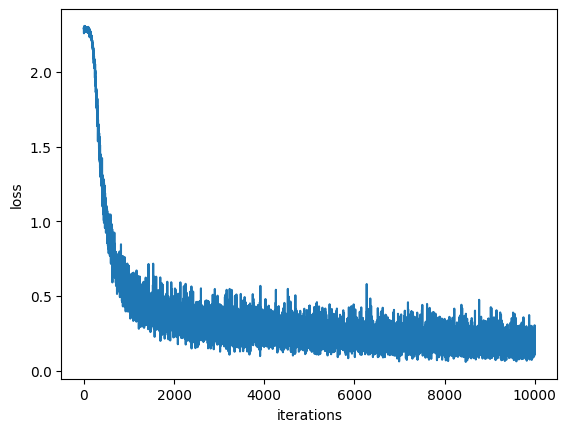

In [2]:
import matplotlib.pyplot as plt

# 損失関数の推移をグラフにする
x = \
np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show

In [4]:
# 正しい評価ができるように、前の実装から少しだけ修正する。

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

train_size = x_train.shape[0]   # 60000枚

# ハイパーパラメータ
iteration_num = 10000
batch_size = 100
learning_rate = 0.1

train_loss_list = []    # 訓練データの損失関数の値を記録するための空リストを用意
train_acc_list = []     # 訓練データの認識精度を記録するための空リストを用意
test_acc_list = []      # テストデータの認識精度を記録するための空リストを用意

# 1エポックあたりの繰り返し数
iteration_per_epoch = max(train_size / batch_size, 1)   # train_size / batch_size で1エポックあたりの繰り返し数が出力されるが、これがもし1未満の場合、繰り返し数は1回（1回だけ回せばいい）ので、(train_size / batch_size, 1)という引数になる。

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iteration_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)

    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)   # 今回も高速版を用いる

    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1エポックごとに認識精度を計算
    if i % iteration_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)  # 各エポックでの訓練データの認識精度を一時保存
        test_acc = network.accuracy(x_test, t_test)     # 各エポックでのテストデータの認識精度を一時保存
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train accuracy, test accuracy | " + str(train_acc) + "," + str(test_acc))

train accuracy, test accuracy | 0.09915,0.1009
train accuracy, test accuracy | 0.7813333333333333,0.789
train accuracy, test accuracy | 0.8773666666666666,0.8812
train accuracy, test accuracy | 0.89805,0.9026
train accuracy, test accuracy | 0.9089166666666667,0.9113
train accuracy, test accuracy | 0.9151666666666667,0.9176
train accuracy, test accuracy | 0.9200666666666667,0.9231
train accuracy, test accuracy | 0.9238,0.9265
train accuracy, test accuracy | 0.9279666666666667,0.9303
train accuracy, test accuracy | 0.9310333333333334,0.9341
train accuracy, test accuracy | 0.934,0.936
train accuracy, test accuracy | 0.9372,0.938
train accuracy, test accuracy | 0.9390166666666667,0.9404
train accuracy, test accuracy | 0.9416,0.9419
train accuracy, test accuracy | 0.9447,0.9428
train accuracy, test accuracy | 0.9456166666666667,0.9452
train accuracy, test accuracy | 0.9470333333333333,0.9453


ValueError: x and y must have same first dimension, but have shapes (600,) and (17,)

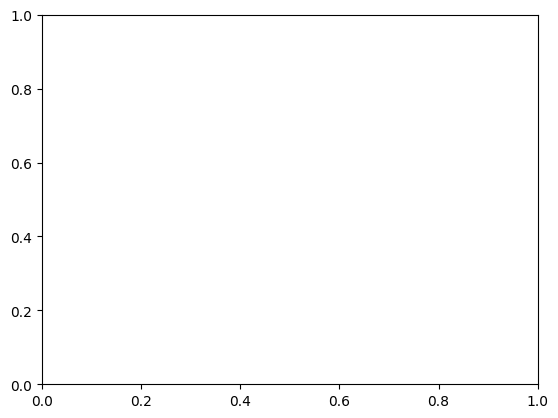

In [7]:
# 訓練データによって学習したニューラルネットワークの、訓練データの認識精度とテストデータの認識精度の一致度をグラフ化

import matplotlib.pyplot as plt

x = np.arange(iteration_per_epoch)

plt.plot(x, train_acc_list)
plt.plot(x, test_acc_list)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show

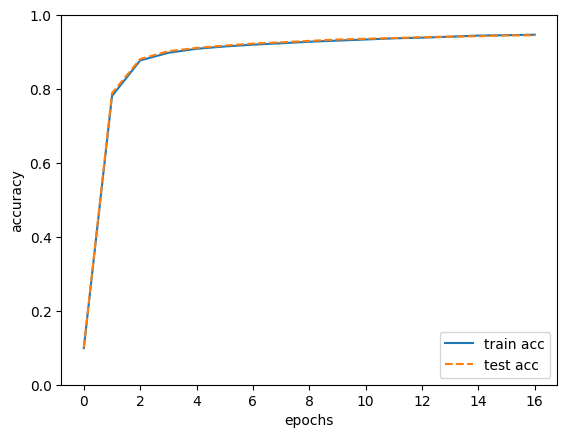

In [8]:
import matplotlib.pyplot as plt

# 修正ポイント1：X軸は「1エポックあたりの繰り返し数(600)」ではなく、「記録されたデータの個数(17)」に合わせる
x = np.arange(len(train_acc_list))

# グラフの描画
plt.plot(x, train_acc_list, label='train acc') # どっちの線か分かるようにラベルを追加
plt.plot(x, test_acc_list, label='test acc', linestyle='--') # テストは点線にすると見やすい

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0) # Y軸の範囲を0～1に固定すると見やすい
plt.legend(loc='lower right') # 凡例を表示

# 修正ポイント2：関数呼び出しにはカッコが必要
plt.show()